在 63 次迭代后收敛。


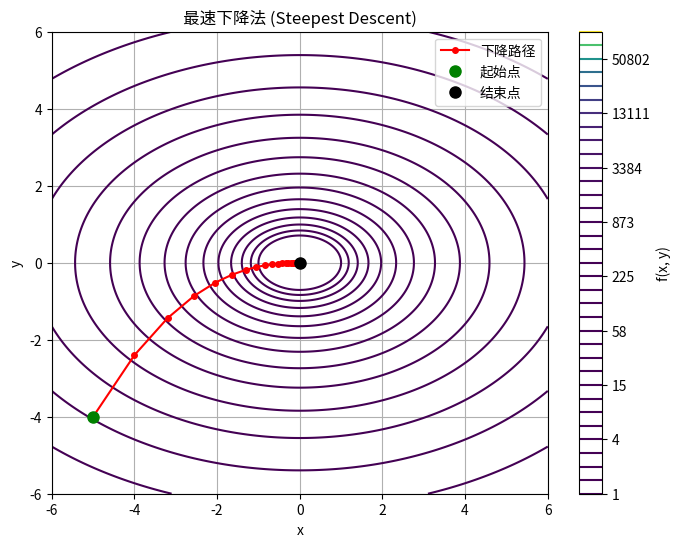

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['svg.fonttype'] = 'none'


import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def objective_function(x, y):
    return x**2 + 2 * y**2

# 定义目标函数的梯度
def gradient(x, y):
    return np.array([2 * x, 4 * y])

# 最速下降法实现
def steepest_descent(start_point, learning_rate, tolerance, max_iterations):
    """
    最速下降法
    :param start_point: 起始点
    :param learning_rate: 学习率
    :param tolerance: 容忍误差
    :param max_iterations: 最大迭代次数
    :return: 路径点
    """
    path = [start_point]
    point = np.array(start_point, dtype=float)

    for i in range(max_iterations):
        grad = gradient(point[0], point[1])
        new_point = point - learning_rate * grad
        path.append(new_point)

        # 检查收敛条件
        if np.linalg.norm(new_point - point) < tolerance:
            print(f"在 {i+1} 次迭代后收敛。")
            break
        point = new_point

    return np.array(path)

# --- 可视化 ---
def plot_descent(path, title):
    # 创建等高线图
    x = np.linspace(-6, 6, 300)
    y = np.linspace(-6, 6, 300)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
    plt.colorbar(label='f(x, y)')

    # 绘制下降路径
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='下降路径')
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=8, label='起始点')
    plt.plot(path[-1, 0], path[-1, 1], 'ko', markersize=8, label='结束点')


    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    # 设置参数
    start_point = [-5, -4]
    learning_rate = 0.1
    tolerance = 1e-6
    max_iterations = 100

    # 运行并可视化
    sd_path = steepest_descent(start_point, learning_rate, tolerance, max_iterations)
    plot_descent(sd_path, '最速下降法 (Steepest Descent)')


在 2 次迭代后收敛。


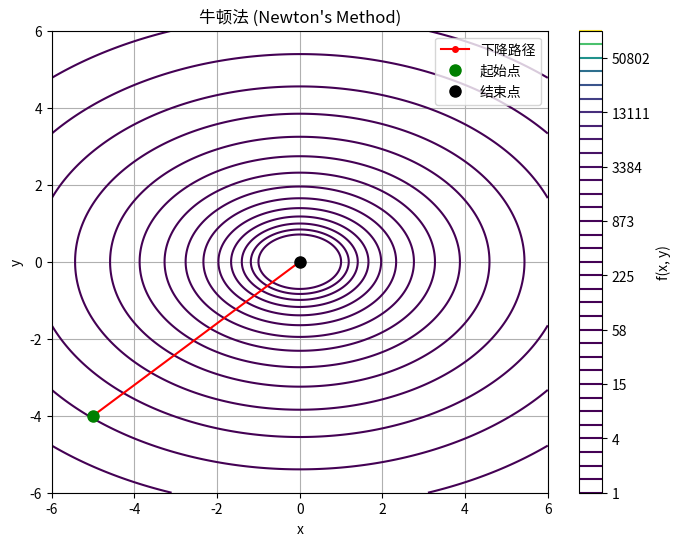

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def objective_function(x, y):
    return x**2 + 2 * y**2

# 定义目标函数的梯度
def gradient(x, y):
    return np.array([2 * x, 4 * y])

# 定义目标函数的Hessian矩阵
def hessian(x, y):
    return np.array([[2, 0], [0, 4]])

# 牛顿法实现
def newton_method(start_point, tolerance, max_iterations):
    """
    牛顿法
    :param start_point: 起始点
    :param tolerance: 容忍误差
    :param max_iterations: 最大迭代次数
    :return: 路径点
    """
    path = [start_point]
    point = np.array(start_point, dtype=float)

    for i in range(max_iterations):
        grad = gradient(point[0], point[1])
        hess = hessian(point[0], point[1])

        # 计算Hessian矩阵的逆
        hess_inv = np.linalg.inv(hess)

        # 计算更新方向 (牛顿方向)
        direction = -hess_inv.dot(grad)

        # 更新点
        new_point = point + direction
        path.append(new_point)

        # 检查收敛条件
        if np.linalg.norm(new_point - point) < tolerance:
            print(f"在 {i+1} 次迭代后收敛。")
            break
        point = new_point

    return np.array(path)

# --- 可视化 ---
def plot_descent(path, title):
    # (可视化函数与最速下降法中的相同)
    x = np.linspace(-6, 6, 300)
    y = np.linspace(-6, 6, 300)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
    plt.colorbar(label='f(x, y)')
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='下降路径')
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=8, label='起始点')
    plt.plot(path[-1, 0], path[-1, 1], 'ko', markersize=8, label='结束点')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    # 设置参数
    start_point = [-5, -4]
    tolerance = 1e-6
    max_iterations = 100

    # 运行并可视化
    nm_path = newton_method(start_point, tolerance, max_iterations)
    plot_descent(nm_path, "牛顿法 (Newton's Method)")

在 2 次迭代后收敛。


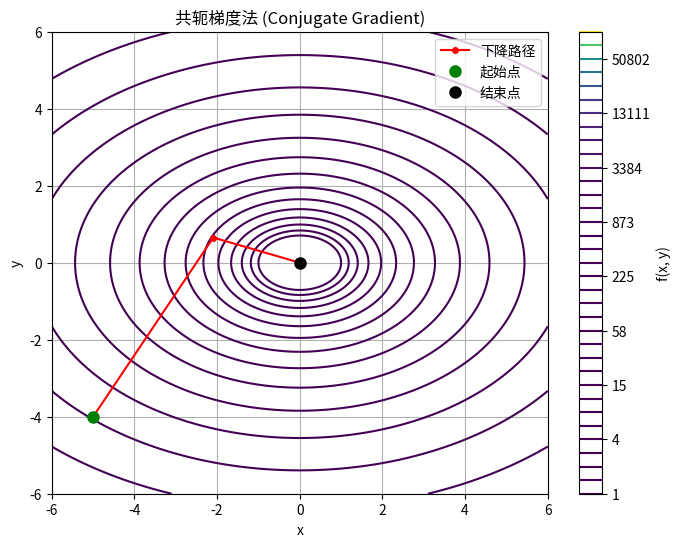

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数 (二次型)
# f(x) = 1/2 * x^T * A * x - b^T * x
# 对于我们的 f(x,y) = x^2 + 2y^2, A = [[2, 0], [0, 4]], b = [0, 0]
A = np.array([[2, 0], [0, 4]])
b = np.array([0, 0])

def objective_function(x):
    return 0.5 * x.T @ A @ x - b.T @ x

# 定义梯度
# grad(f(x)) = A*x - b
def gradient(x):
    return A @ x - b

# 共轭梯度法实现
def conjugate_gradient(start_point, tolerance, max_iterations):
    """
    共轭梯度法
    :param start_point: 起始点
    :param tolerance: 容忍误差
    :param max_iterations: 最大迭代次数
    :return: 路径点
    """
    path = [start_point]
    x = np.array(start_point, dtype=float)

    r = -gradient(x)  # 初始残差 (即负梯度)
    d = r  # 初始搜索方向
    r_k_norm = np.dot(r, r)

    for i in range(max_iterations):
        Ad = A @ d
        alpha = r_k_norm / np.dot(d, Ad)

        x_new = x + alpha * d
        path.append(x_new)

        r_new = r - alpha * Ad

        # 检查收敛条件
        if np.linalg.norm(r_new) < tolerance:
            print(f"在 {i+1} 次迭代后收敛。")
            break

        beta = np.dot(r_new, r_new) / r_k_norm
        d = r_new + beta * d

        x = x_new
        r = r_new
        r_k_norm = np.dot(r, r)

    return np.array(path)


# --- 可视化 ---
def plot_descent_cg(path, title):
    # (可视化函数与之前类似，但目标函数定义稍有不同)
    x_range = np.linspace(-6, 6, 300)
    y_range = np.linspace(-6, 6, 300)
    X, Y = np.meshgrid(x_range, y_range)
    Z = X**2 + 2*Y**2 # 使用原始形式方便绘图

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
    plt.colorbar(label='f(x, y)')
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=4, label='下降路径')
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=8, label='起始点')
    plt.plot(path[-1, 0], path[-1, 1], 'ko', markersize=8, label='结束点')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    # 设置参数
    start_point = [-5, -4]
    tolerance = 1e-6
    max_iterations = 100

    # 运行并可视化
    cg_path = conjugate_gradient(start_point, tolerance, max_iterations)
    plot_descent_cg(cg_path, '共轭梯度法 (Conjugate Gradient)')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search


plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['svg.fonttype'] = 'none'


# 1. 定义新的目标函数 (Beale Function)
def objective_function(p):
    x, y = p[0], p[1]
    term1 = (1.5 - x + x * y)
    term2 = (2.25 - x + x * y**2)
    term3 = (2.625 - x + x * y**3)
    return term1**2 + term2**2 + term3**2

# 2. 定义梯度 (Gradient)
def gradient(p):
    x, y = p[0], p[1]
    df_dx = 2 * (1.5 - x + x*y) * (y - 1) + \
            2 * (2.25 - x + x*y**2) * (y**2 - 1) + \
            2 * (2.625 - x + x*y**3) * (y**3 - 1)
    df_dy = 2 * (1.5 - x + x*y) * x + \
            2 * (2.25 - x + x*y**2) * (2*x*y) + \
            2 * (2.625 - x + x*y**3) * (3*x*y**2)
    return np.array([df_dx, df_dy])

# 3. 定义Hessian矩阵 (Hessian Matrix)
def hessian(p):
    x, y = p[0], p[1]
    # 二阶偏导数
    d2f_dx2 = 2 * (y - 1)**2 + 2 * (y**2 - 1)**2 + 2 * (y**3 - 1)**2
    
    d2f_dy2 = 2 * x**2 + \
              2 * (2*x**2 + 2*x*(2.25 - x + x*y**2)) + \
              2 * (6*x**2*y + 2*x*(2.625 - x + x*y**3)*3*y) # 简化和合并项后
    d2f_dy2_term1 = 2*x**2
    d2f_dy2_term2 = 4*x**2 + 4*x*(2.25 - x + x*y**2)
    d2f_dy2_term3 = 12*x**2*y + 6*x*y*(2.625-x+x*y**3) #修正
    d2f_dy2_final = 2*x**2 + (4*x**2 + 4*x*(2.25 - x + x*y**2)) + (18*x**2*y**2) # 重新计算
    
    # 重新进行符号计算以确保准确性
    # f(x,y)=(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2
    # df/dy = 2(1.5-x+xy)x + 2(2.25-x+xy^2)(2xy) + 2(2.625-x+xy^3)(3xy^2)
    # d2f/dy2 = 2x^2 + 2(2x)^2*y^2 + 2(2.25-x+xy^2)(2x) + 2(3x*y^2)^2 + 2(2.625-x+xy^3)(6xy)
    d2f_dy2 = 2*x**2 + 8*x**2*y**2 + 4*x*(2.25-x+x*y**2) + 18*x**2*y**4 + 12*x*y*(2.625-x+x*y**3)

    d2f_dxdy = 2*(y-1) + 2*x*(y-1) + \
               2*(y**2-1) + 2*x*(y**2-1)*2*y + \
               2*(y**3-1) + 2*x*(y**3-1)*3*y**2
               
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# --- 可视化函数 (适用于所有方法) ---
def plot_descent(path, title):
    # 创建等高线图
    x = np.linspace(0, 4.5, 300)
    y = np.linspace(-1, 2, 300)
    X, Y = np.meshgrid(x, y)
    Z = objective_function([X, Y])

    plt.figure(figsize=(10, 8))
    # 使用对数尺度使等高线更清晰
    plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis_r')
    plt.colorbar(label='f(x, y) [log scale]')

    # 绘制下降路径
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=3, linewidth=1.5, label='下降路径')
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=8, label='起始点')
    plt.plot(3, 0.5, 'y*', markersize=15, label='真实最小值') # 最小值点

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

最速下降法: 达到最大迭代次数 5000。


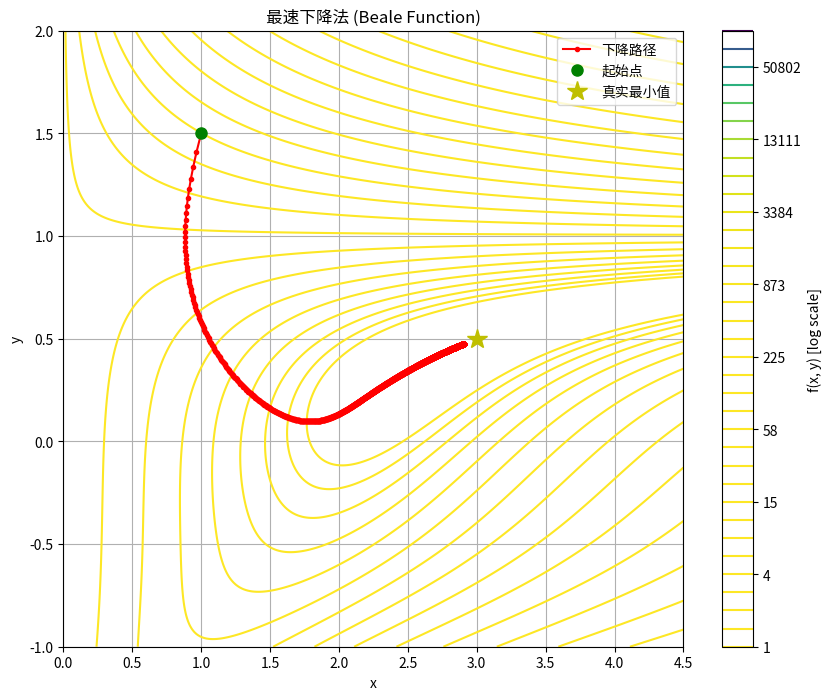

In [5]:
def steepest_descent(start_point, learning_rate, tolerance, max_iterations):
    path = [np.array(start_point)]
    point = np.array(start_point, dtype=float)

    for i in range(max_iterations):
        grad = gradient(point)
        
        # 简单的步长更新
        new_point = point - learning_rate * grad
        
        # 检查收敛
        if np.linalg.norm(new_point - point) < tolerance:
            print(f"最速下降法: 在 {i+1} 次迭代后收敛。")
            break
            
        point = new_point
        path.append(point)
    else: # for循环正常结束
        print(f"最速下降法: 达到最大迭代次数 {max_iterations}。")


    return path

# --- 运行 ---
start_point_sd = [1, 1.5]
learning_rate_sd = 0.001 # 对于这个函数需要一个很小的学习率
tolerance_sd = 1e-7
max_iterations_sd = 5000

sd_path = steepest_descent(start_point_sd, learning_rate_sd, tolerance_sd, max_iterations_sd)
plot_descent(sd_path, '最速下降法 (Beale Function)')

牛顿法: 达到最大迭代次数 50。


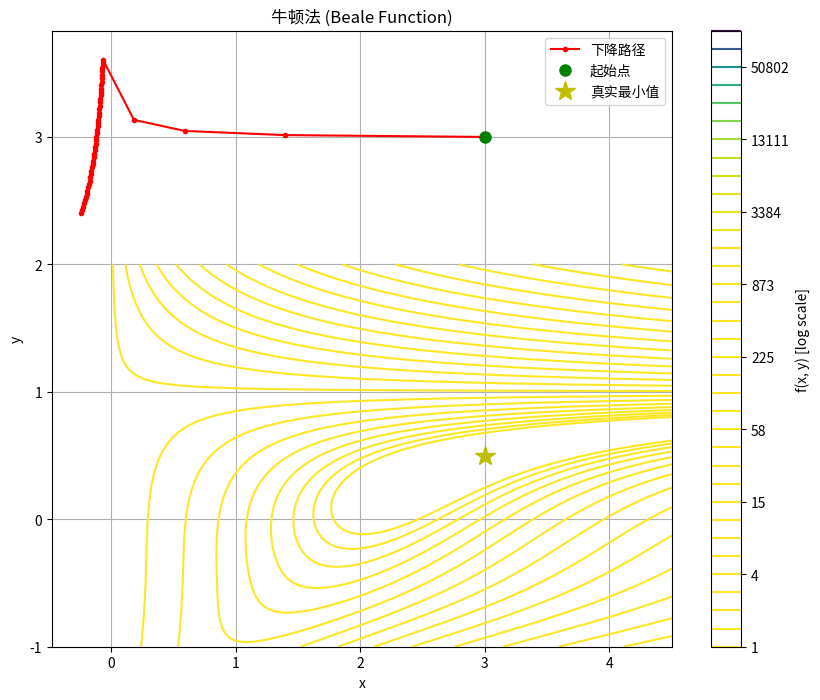

In [21]:
def newton_method(start_point, tolerance, max_iterations):
    path = [np.array(start_point)]
    point = np.array(start_point, dtype=float)

    for i in range(max_iterations):
        grad = gradient(point)
        hess = hessian(point)

        try:
            # 计算Hessian矩阵的逆
            hess_inv = np.linalg.inv(hess)
            # 计算牛顿方向
            direction = -hess_inv.dot(grad)
        except np.linalg.LinAlgError:
            # 如果Hessian矩阵是奇异的，则退化为最速下降
            print(f"警告: 第 {i+1} 次迭代时Hessian矩阵为奇异矩阵，退化为梯度下降。")
            direction = -grad

        # 更新点 (使用固定的小步长防止发散)
        alpha = 0.5 
        new_point = point + alpha * direction
        
        # 检查收敛
        if np.linalg.norm(new_point - point) < tolerance:
            print(f"牛顿法: 在 {i+1} 次迭代后收敛。")
            break
        
        point = new_point
        path.append(point)
    else:
        print(f"牛顿法: 达到最大迭代次数 {max_iterations}。")

    return path

# --- 运行 ---
start_point_nm = [3, 3]
tolerance_nm = 1e-7
max_iterations_nm = 50

nm_path = newton_method(start_point_nm, tolerance_nm, max_iterations_nm)
plot_descent(nm_path, "牛顿法 (Beale Function)")

共轭梯度法: 线搜索失败或步长过小，在 6 次迭代后停止。


/tmp/ipykernel_711808/511349783.py:11: LineSearchWarning: The line search algorithm did not converge
  alpha_search_result = line_search(objective_function, gradient, x, d)


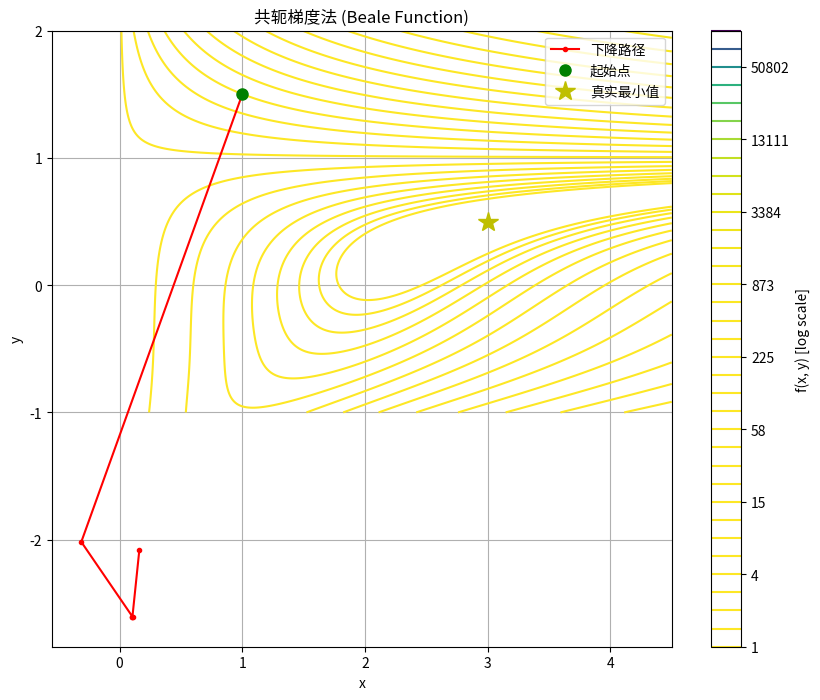

In [18]:
def conjugate_gradient(start_point, tolerance, max_iterations):
    path = [np.array(start_point)]
    x = np.array(start_point, dtype=float)

    grad_old = gradient(x)
    d = -grad_old
    
    for i in range(max_iterations):
        # 使用线搜索寻找最优步长 alpha
        # line_search 返回 (alpha, f_evals, grad_evals, new_f_val, old_f_val, new_grad)
        alpha_search_result = line_search(objective_function, gradient, x, d)
        alpha = alpha_search_result[0]
        
        # 如果线搜索失败或步长太小，则停止
        if alpha is None or alpha < 1e-10:
            print(f"共轭梯度法: 线搜索失败或步长过小，在 {i+1} 次迭代后停止。")
            break
            
        # 更新点
        x_new = x + alpha * d
        path.append(x_new)
        
        # 检查收敛
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"共轭梯度法: 在 {i+1} 次迭代后收敛。")
            break

        x = x_new
        
        # 更新搜索方向 (Fletcher-Reeves)
        grad_new = gradient(x)
        beta = np.dot(grad_new, grad_new) / np.dot(grad_old, grad_old)
        d = -grad_new + beta * d
        grad_old = grad_new
    else:
        print(f"共轭梯度法: 达到最大迭代次数 {max_iterations}。")

    return path

# --- 运行 ---
start_point_cg = [1, 1.5]
tolerance_cg = 1e-7
max_iterations_cg = 5000

cg_path = conjugate_gradient(start_point_cg, tolerance_cg, max_iterations_cg)
plot_descent(cg_path, '共轭梯度法 (Beale Function)')